<a href="https://colab.research.google.com/github/ashish260289/HR-Analytics/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
train=pd.read_csv("train_LZdllcl.csv")
test=pd.read_csv('test_2umaH9m.csv')

In [3]:
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.isnull().sum()

,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,4124
length_of_service,0


In [6]:
train['education'].value_counts()

,count
education,
Bachelor's,36669
Master's & above,14925
Below Secondary,805


<ipython-input-9-38febf28dd43>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_promoted', data=train, palette='coolwarm')


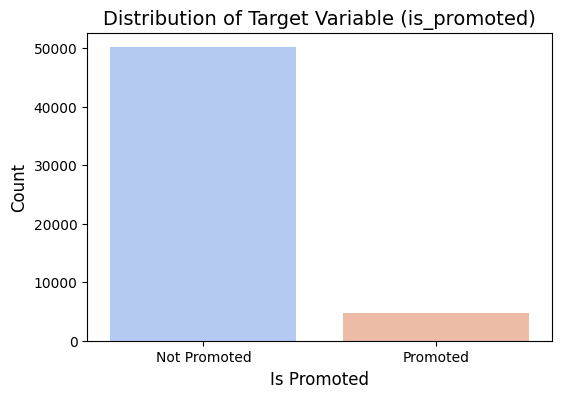

In [9]:
# 1. Distribution of the Target Variable (is_promoted)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_promoted', data=train, palette='coolwarm')
plt.title('Distribution of Target Variable (is_promoted)', fontsize=14)
plt.xlabel('Is Promoted', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Promoted', 'Promoted'], fontsize=10)
plt.show()


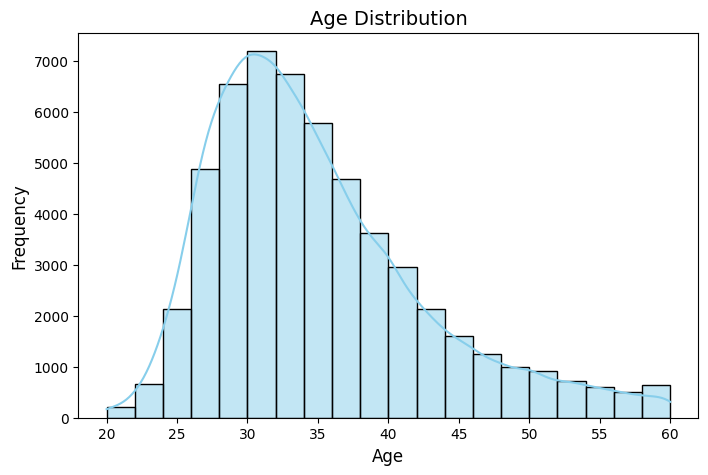

In [11]:
# 2. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(train['age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

<ipython-input-12-0beb1aa91a2b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_promoted', y='avg_training_score', data=train, palette='coolwarm')


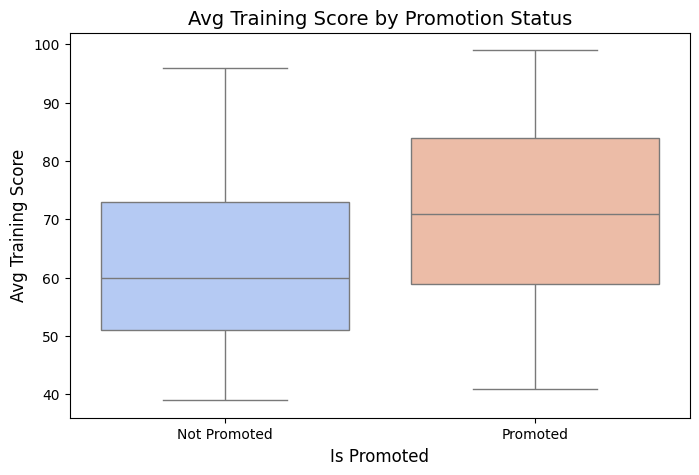

In [12]:
# 3. Average Training Score by Promotion Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_promoted', y='avg_training_score', data=train, palette='coolwarm')
plt.title('Avg Training Score by Promotion Status', fontsize=14)
plt.xlabel('Is Promoted', fontsize=12)
plt.ylabel('Avg Training Score', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Promoted', 'Promoted'], fontsize=10)
plt.show()

<ipython-input-13-ec3aef4c7170>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=train, palette='Set2')


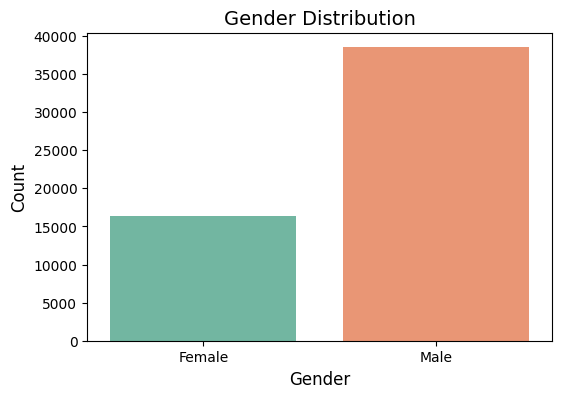

In [13]:
# 4. Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=train, palette='Set2')
plt.title('Gender Distribution', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], fontsize=10)
plt.show()

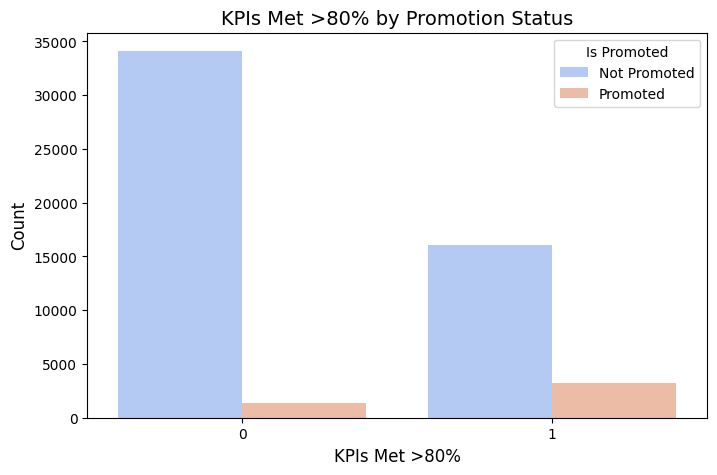

In [14]:
# 5. KPI Met (>80%) by Promotion Status
plt.figure(figsize=(8, 5))
sns.countplot(x='KPIs_met >80%', hue='is_promoted', data=train, palette='coolwarm')
plt.title('KPIs Met >80% by Promotion Status', fontsize=14)
plt.xlabel('KPIs Met >80%', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Is Promoted', labels=['Not Promoted', 'Promoted'], fontsize=10)
plt.show()

<ipython-input-15-876db53aade4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='department', data=train, order=train['department'].value_counts().index, palette='viridis')


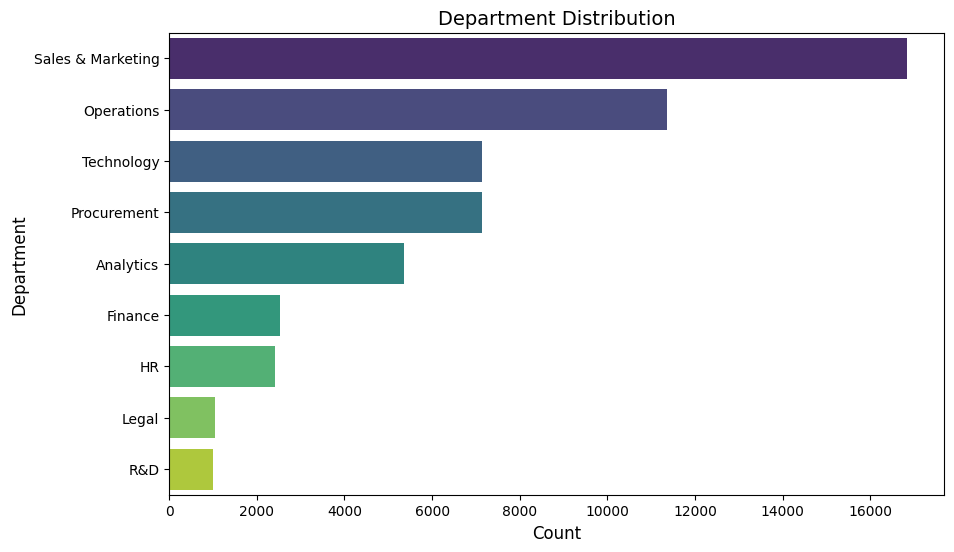

In [15]:
# 6. Department Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='department', data=train, order=train['department'].value_counts().index, palette='viridis')
plt.title('Department Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.show()

<ipython-input-16-65d000b7d432>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_promoted', y='length_of_service', data=train, palette='coolwarm')


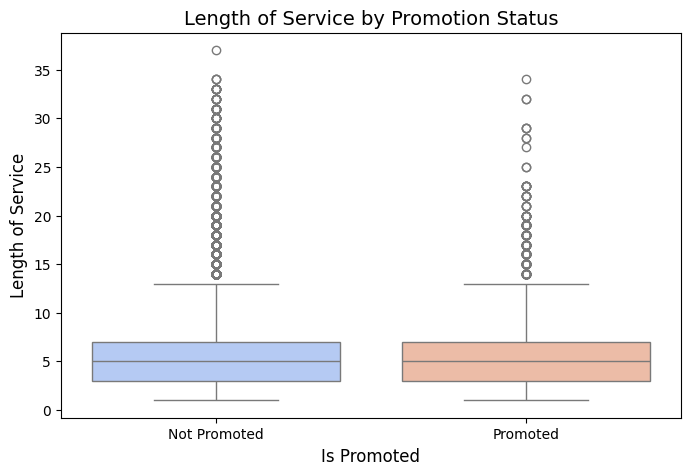

In [16]:
# 7. Length of Service Distribution by Promotion Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_promoted', y='length_of_service', data=train, palette='coolwarm')
plt.title('Length of Service by Promotion Status', fontsize=14)
plt.xlabel('Is Promoted', fontsize=12)
plt.ylabel('Length of Service', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Not Promoted', 'Promoted'], fontsize=10)
plt.show()

<ipython-input-17-975440aa4221>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=train, order=train['education'].value_counts().index, palette='cubehelix')


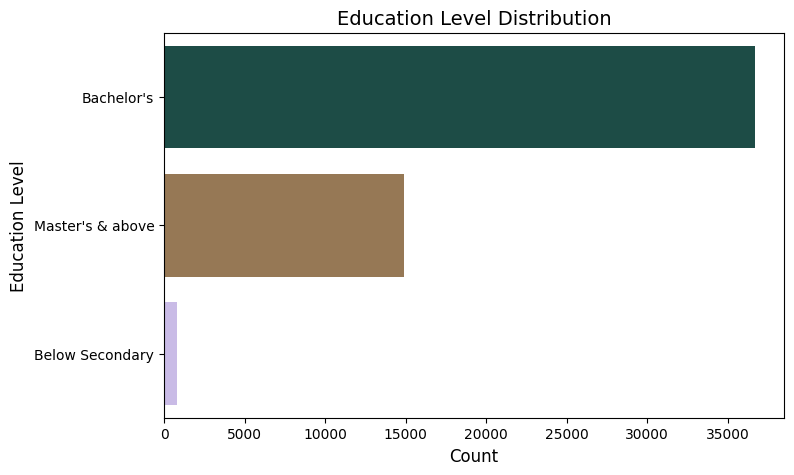

In [17]:
# 8. Education Level Distribution
plt.figure(figsize=(8, 5))
sns.countplot(y='education', data=train, order=train['education'].value_counts().index, palette='cubehelix')
plt.title('Education Level Distribution', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.show()


<ipython-input-18-55099f4eb812>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=train, order=train['region'].value_counts().index, palette='coolwarm')


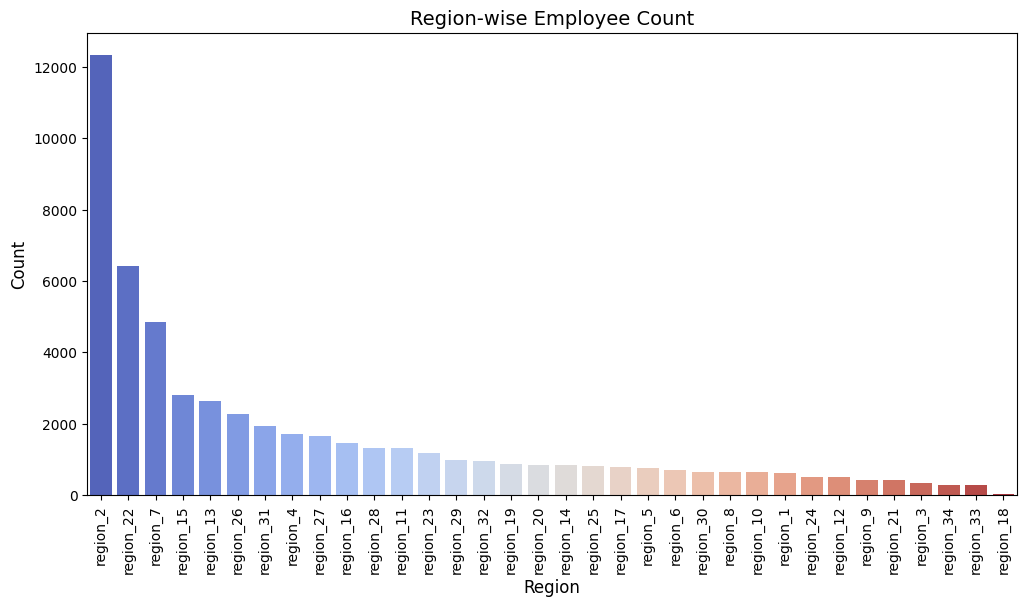

In [18]:
# 9. Region-wise Employee Count
plt.figure(figsize=(12, 6))
sns.countplot(x='region', data=train, order=train['region'].value_counts().index, palette='coolwarm')
plt.title('Region-wise Employee Count', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.show()